In [1]:
import scipy.io
data = scipy.io.loadmat('lipase_data.mat')
A=data['A'] #spectra with shape samples*no of wavelengths
c0=data['c0'][0] #initial concentration of species(S)
N=data['N'] #Stoichiometric matrix R*S
tau=data['tau'].T[0] #array of timestamps
lamdas=data['lamda'] #Wavelengths array
n=2 #no of parameters

In [2]:
A.shape

(15, 401)

In [3]:
c0.shape

(3,)

In [4]:
N.shape

(1, 3)

In [5]:
tau.shape

(15,)

In [6]:
lamdas.shape

(401, 1)

In [7]:
N

array([[-1,  1,  1]], dtype=int16)

In [8]:
#C - list of conc of species
#t - time
#pars -list of parameters
def model(C,t,pars):
    #custom kinetic model
    M=np.array([[(pars[1]*C[0])/(pars[0]+C[0])]]) #Michaelis-Menten kinetic model
    dcdt=(N.T)@M
    return dcdt.flatten().tolist()

In [9]:
#importing KineParEs package
from KineParEs import *
#creating parameter estimation object
# par=par_estimate(A,c0,N,tau,lamdas,n,"custom",model)
par=par_estimate(A,c0,N,tau,lamdas,n,"1")

# Raw Data

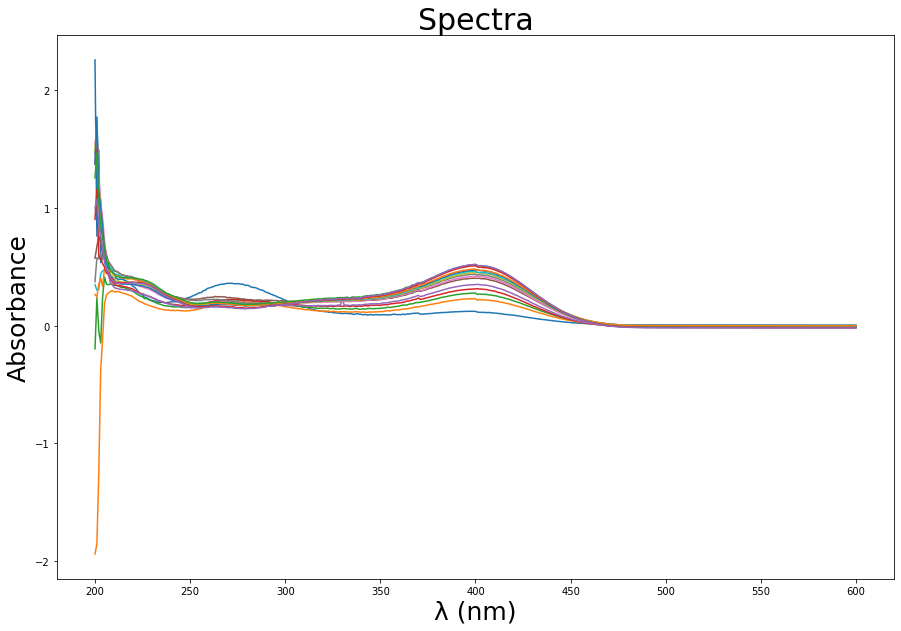

In [10]:
#Actual Spectra
par.spectrum_plot()

# Data Preprocessing

In [11]:
#checks input dimensions of all data given
par.preprocess()
#setting req part of spectrum, removing first 100 and last 20 wavelegths
par.subset_slice(100,20)

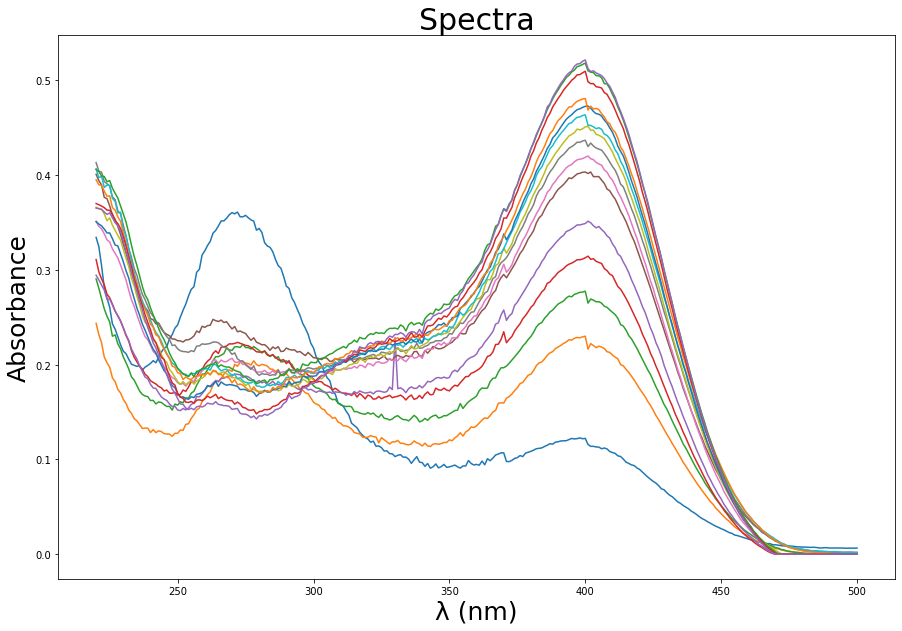

In [12]:
par.spectrum_plot()

In [13]:
#Savitzky-Golay smoothing filter
par.savitzky_golay(window_size=5,order=3) 

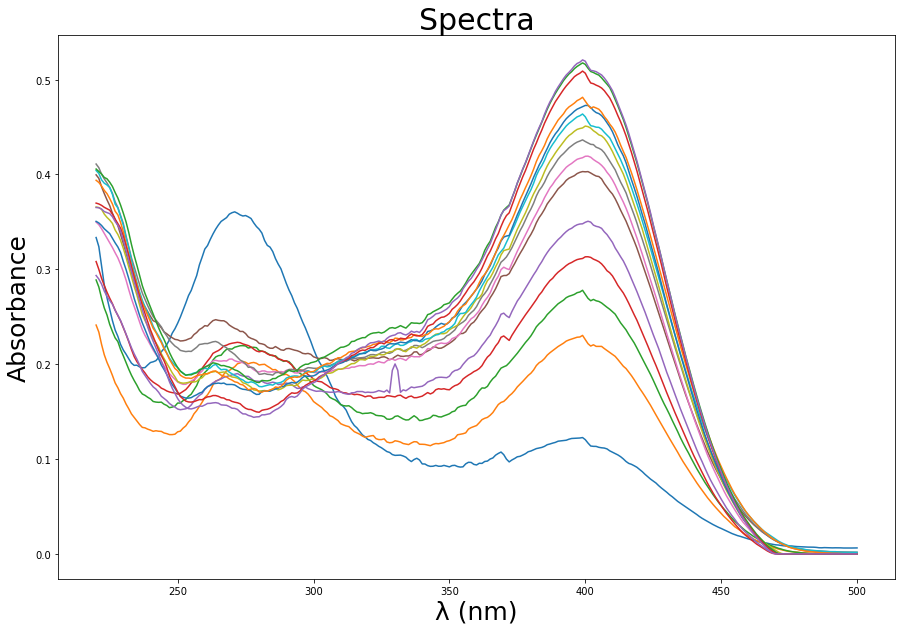

In [14]:
par.spectrum_plot()

# Parameter Estimation

'''LB & UB for each parameter and number of iterations 
(for different initial guess of parameters) are given
as input for optim function. This function outputs
final estimated parameters as tuple.''' 

In [15]:
values=par.optim(bounds=((0.08,0.15), (0.01, 0.025)),niters=500)
values

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:34<00:00,  5.32it/s]


(array([0.12431403, 0.02142064]), 1.0359775991982387)

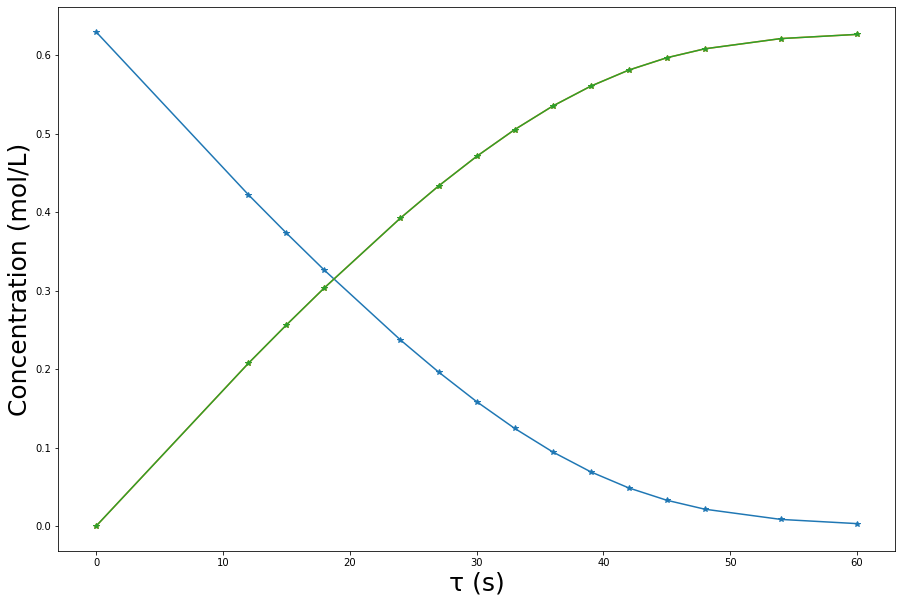

In [16]:
#For concentration profile with estimated parameters
par.conc_profile(tuple(values[0]))

In [17]:
def model1(C,t,pars):
    #custom kinetic model
    M=np.array([[(pars[1]*C[0])/(pars[0]+C[0])]]) #Michaelis-Menten kinetic model
    dcdt=(N.T)@M
    return dcdt.flatten().tolist()

In [18]:
def model2(C,t,pars):
    #custom kinetic model
    M=np.array([[(pars[1]-C[0])/(pars[0]+C[0])]])
    dcdt=(N.T)@M
    return dcdt.flatten().tolist()

In [19]:
def model3(C,t,pars):
    #custom kinetic model
    M=np.array([[(pars[1]+C[0])/(pars[0]+C[0])]])
    dcdt=(N.T)@M
    return dcdt.flatten().tolist()

In [20]:
def model4(C,t,pars):
    #custom kinetic model
    M=np.array([[(pars[0]*C[0])/(pars[1]+C[0])]])
    dcdt=(N.T)@M
    return dcdt.flatten().tolist()

In [21]:
par.fun_arr([model1,model2,model3,model4],bounds=((0.08,0.15), (0.01, 0.025)))

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:25<00:00,  5.85it/s]

Best fit kinetic model :  1


array([0.12431418, 0.02142064])

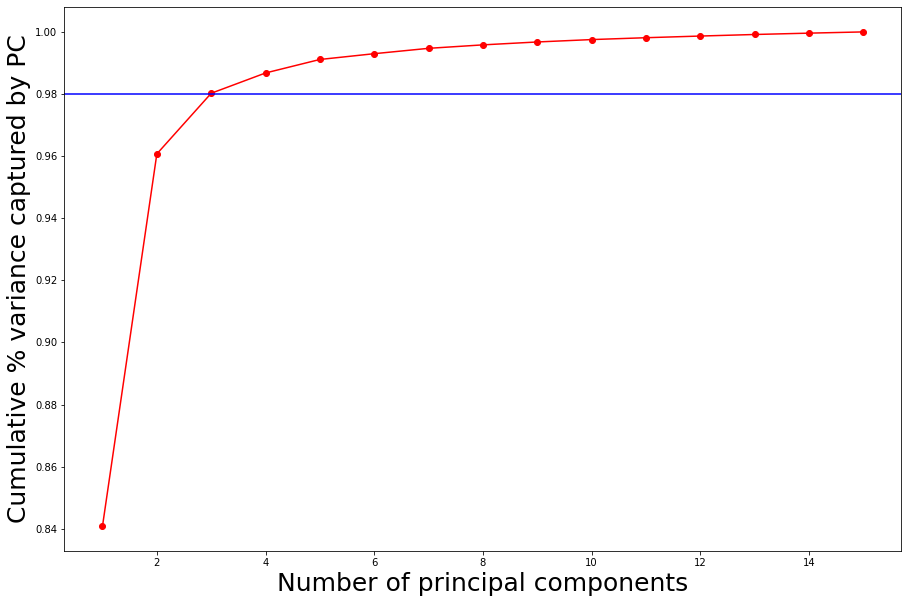

In [22]:
#Rank analysis for reaction system
par.variance_ratio()

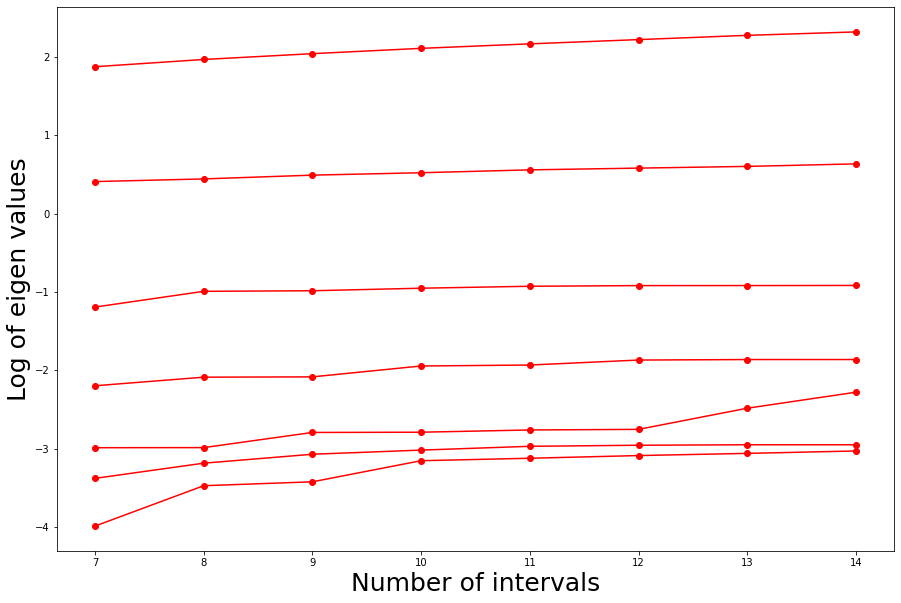

In [23]:
#For Forward Evolving Factor Analysis
par.forward_EFA(step=1,comp=7)

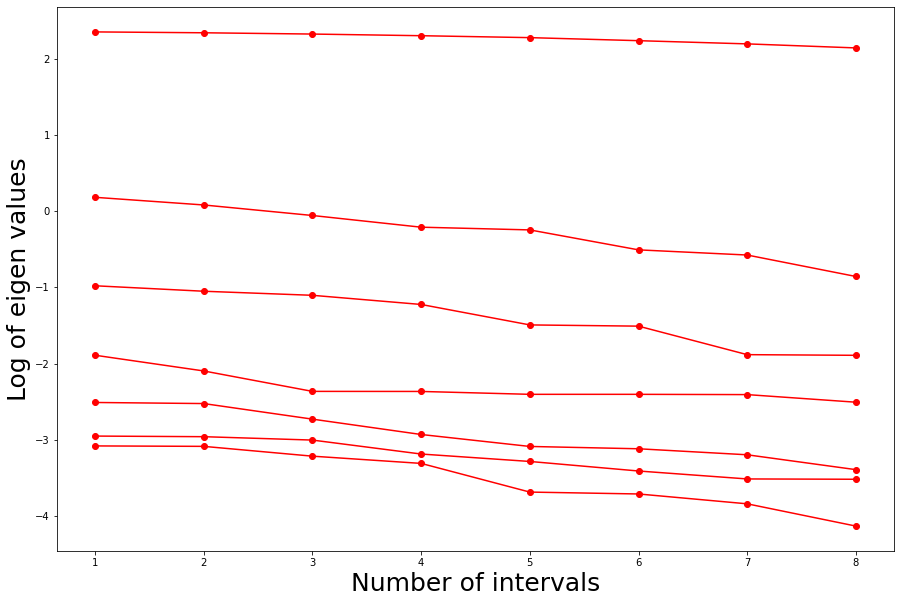

In [24]:
#For Backward Evolving Factor Analysis
par.backward_EFA(step=1,comp=7)

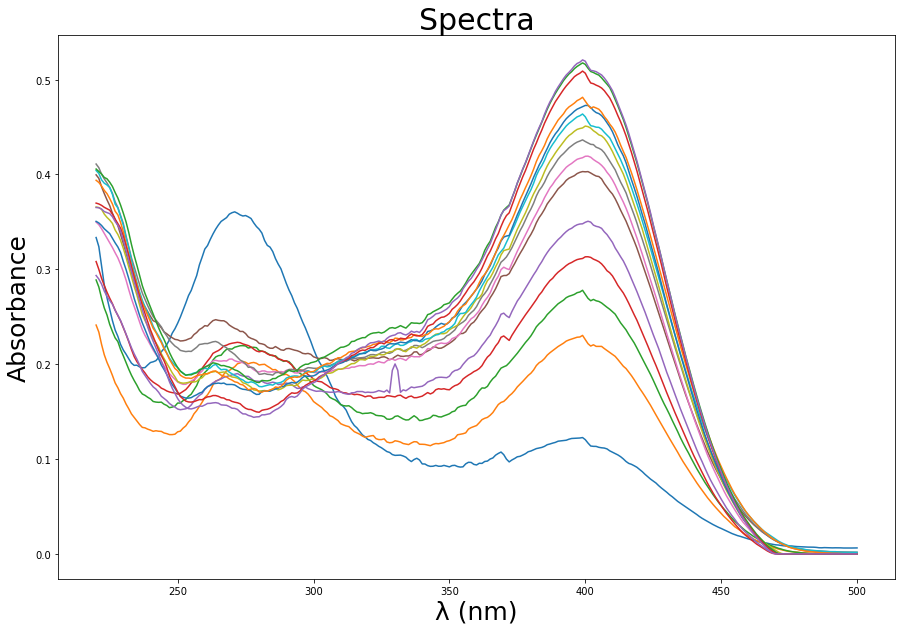

In [25]:
par.spectrum_plot()

In [26]:
#For Multiplicative scattering correction of spectra
par.MSC()

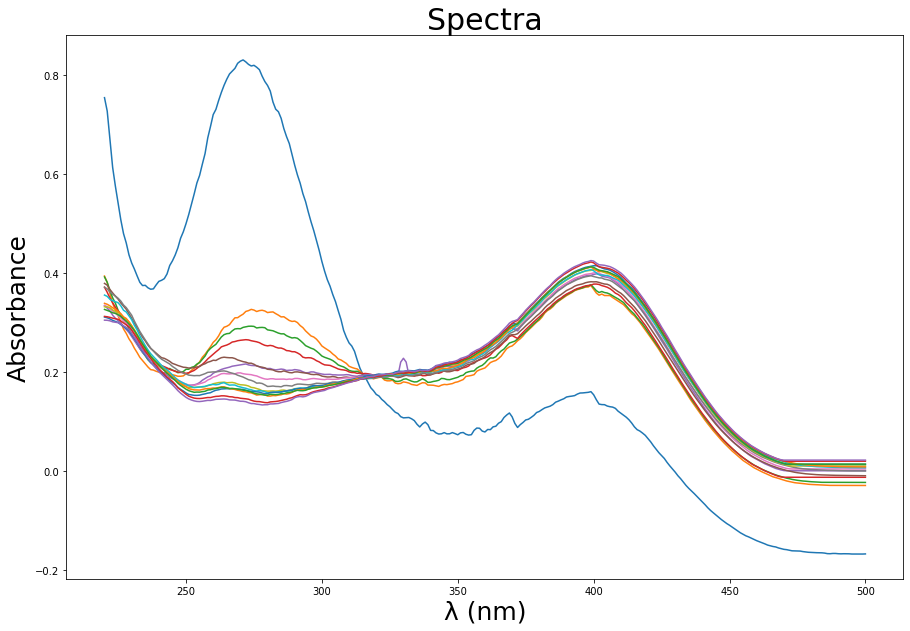

In [27]:
par.spectrum_plot()